## Setup

#### Imports

In [1]:
import numpy as np
import pandas as pd

import datetime as dt

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

import seaborn as sns

#### Configuration

In [2]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20


#Set the font of all plots to improve readability
font = {'family' : 'sans-serif',
        'weight' : 'normal'}

plt.rc('font', **font)
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


## Load Data

In [3]:
bids_antiques = pd.read_pickle('processeddata/bids_antiques.pkl')

In [4]:
bids_computers = pd.read_pickle('processeddata/bids_computers.pkl')

## Accumulate last bids

#### User level

In [5]:
bids_antiques_userlevel = bids_antiques.groupby(by=['Itemnumber', 'Bidder']).agg({'Time Left': 'min'})
bids_antiques_userlevel['Category'] = 'Antiques'

bids_computers_userlevel = bids_computers.groupby(by=['Itemnumber', 'Bidder']).agg({'Time Left': 'min'})
bids_computers_userlevel['Category'] = 'Computers'

bids_userlevel = bids_antiques_userlevel.append(bids_computers_userlevel)

bids_userlevel['Seconds_left'] = bids_userlevel['Time Left'].apply(lambda x: x.total_seconds() * -1)

#### Auction level

In [6]:
bids_antiques_auctionlevel = bids_antiques.groupby(by=['Itemnumber']).agg({'Time Left': 'min'})
bids_antiques_auctionlevel['Category'] = 'Antiques'

bids_computers_auctionlevel = bids_computers.groupby(by=['Itemnumber']).agg({'Time Left': 'min'})
bids_computers_auctionlevel['Category'] = 'Computers'

bids_auctionlevel = bids_antiques_auctionlevel.append(bids_computers_auctionlevel)

bids_auctionlevel['Seconds_left'] = bids_auctionlevel['Time Left'].apply(lambda x: x.total_seconds() * -1)

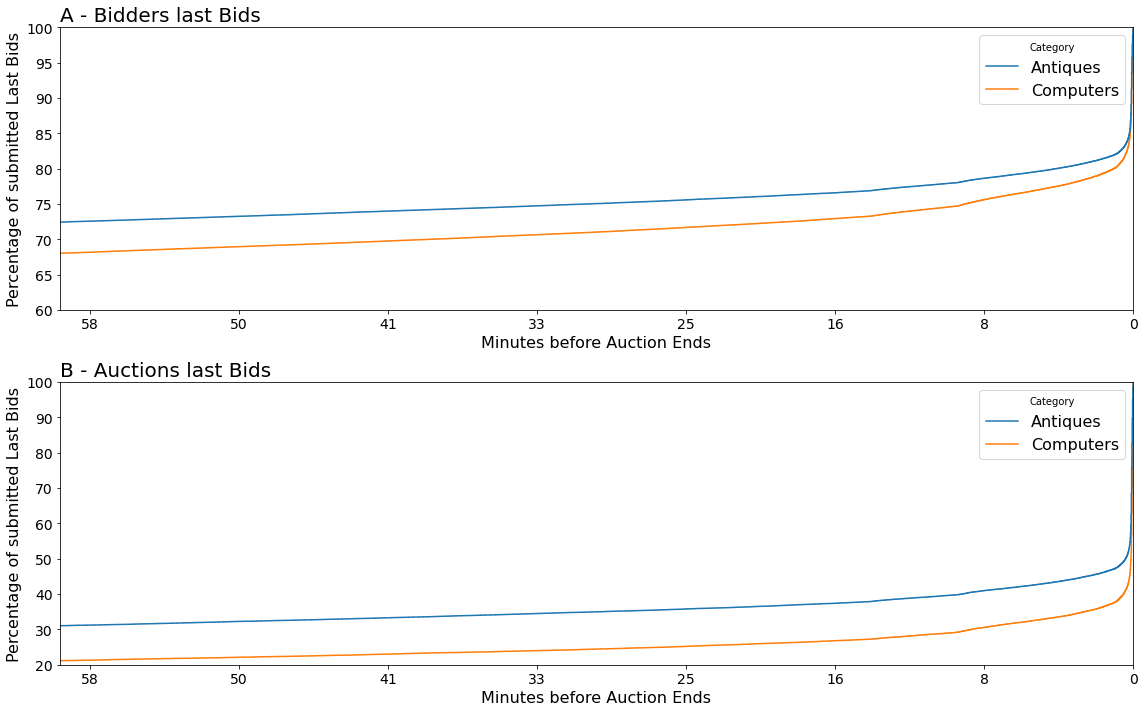

In [10]:
xformatter = FuncFormatter(lambda x_val, tick_pos: abs(int(x_val / 60)))
yformatter = FuncFormatter(lambda y_val, tick_pos: int(y_val * 100))

fig, axs = plt.subplots(2, figsize=(16,10))


axs[0] = sns.ecdfplot(ax = axs[0], data=bids_userlevel, x="Seconds_left", hue='Category')

axs[0].set_title('A - Bidders last Bids', loc='left')

axs[0].xaxis.set_major_formatter(xformatter)
axs[0].yaxis.set_major_formatter(yformatter)

axs[0].set_xlim(left =-3600, right = 0)
axs[0].set_ylim(bottom = 0.6)

axs[0].set_xlabel('Minutes before Auction Ends')
axs[0].set_ylabel('Percentage of submitted Last Bids')



axs[1] = sns.ecdfplot(ax = axs[1], data=bids_auctionlevel, x="Seconds_left", hue='Category')

axs[1].set_title('B - Auctions last Bids', loc='left')

axs[1].xaxis.set_major_formatter(xformatter)
axs[1].yaxis.set_major_formatter(yformatter)

axs[1].set_xlim(left =-3600, right = 0)
axs[1].set_ylim(bottom = 0.2)

axs[1].set_xlabel('Minutes before Auction Ends')
axs[1].set_ylabel('Percentage of submitted Last Bids')

fig.tight_layout()

plt.savefig('figure1_last_bids_cumulated.pdf')

plt.show()

## Identify percentage of auctions within the last x seconds

#### User level

In [17]:
len(bids_userlevel[bids_userlevel['Seconds_left'] > -10]) / len(bids_userlevel)

0.14292972335125212

In [18]:
len(bids_userlevel[bids_userlevel['Seconds_left'] > -60]) / len(bids_userlevel)

0.18884742175354474

In [19]:
len(bids_userlevel[bids_userlevel['Seconds_left'] > -3600]) / len(bids_userlevel)

0.296713742531233

In [25]:
len(bids_userlevel[bids_userlevel['Seconds_left'] > -10]) / len(bids_userlevel[bids_userlevel['Seconds_left'] > -3600])

0.4817091454272864

#### Auction level

In [20]:
len(bids_auctionlevel[bids_auctionlevel['Seconds_left'] > -10]) / len(bids_auctionlevel)

0.4796770377516682

In [21]:
len(bids_auctionlevel[bids_auctionlevel['Seconds_left'] > -60]) / len(bids_auctionlevel)

0.5675843296695724

In [22]:
len(bids_auctionlevel[bids_auctionlevel['Seconds_left'] > -3600]) / len(bids_auctionlevel)

0.7314428786364837

In [26]:
len(bids_auctionlevel[bids_auctionlevel['Seconds_left'] > -10]) / len(bids_auctionlevel[bids_auctionlevel['Seconds_left'] > -3600])

0.6557956222717709